# About

## *Simple Linear Regression*
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. It involves two variables. We will be using the scikit library for the creation of this model.

# Importing all libraries

In [1]:
# Data manipulation tool
import numpy as np
import pandas as pd

# Data visualization tool
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test split
from sklearn.model_selection import train_test_split

# Model selection
from sklearn.linear_model import LinearRegression

# Model evalutaion
from sklearn.metrics import mean_absolute_error

# Uploading the dataset

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Dataset imported sucessfully !")

Dataset imported sucessfully !


# Data Analysis

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

## Scatter Plot

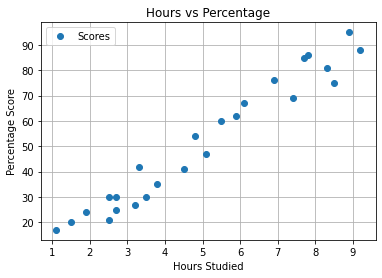

In [8]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

## Heatmap

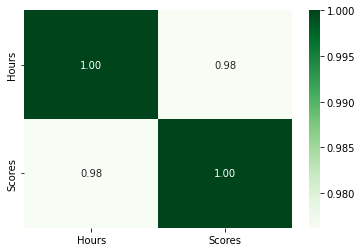

In [9]:
sns.heatmap(df.corr(), annot=True, fmt="0.2f", cmap="Greens")

*From the graph above, we can clearly see that there is a strong positive correlation between the number of hours studied and percentage of score.*

# Machine Learning

## Preparing the data for training the model

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Spliting the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Choosing the model

In [12]:
model = LinearRegression()

## Training the model

In [13]:
model.fit(X_train, y_train)
print("Model trained successfully !")

Model trained successfully !


## plotting the regression line

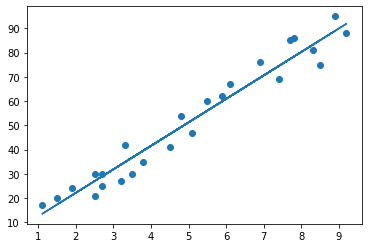

In [14]:
# Plotting the regression line
line = model.coef_ * X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)

plt.plot(X, line);
plt.show()

## Predicting values

In [15]:
y_pred = model.predict(X_test)

## Actual vs Predicted values

In [16]:
diff_val = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
diff_val 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## Testing with our own data

In [17]:
hours = np.array(9.25)
own_pred = model.predict(hours.reshape(1, -1))

print("Noumber of hours studied = {}".format(hours))
print("Score obtained = {}".format(own_pred[0]))

Noumber of hours studied = 9.25
Score obtained = 92.38611528261494


## Model accuracy

In [18]:
model.score(X_test, y_test)

0.9678055545167994

## Model evaluation

In [19]:
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error Score : {mae}')

Mean Absolute Error Score : 3.9207511902099244
